In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

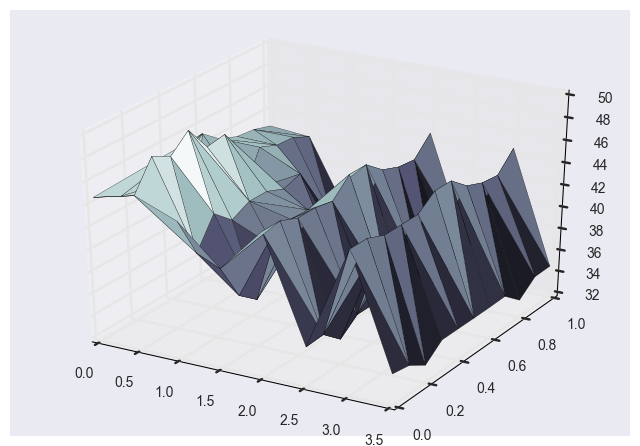

In [2]:
n_angles = 36
n_radii = 8 # An array of radii
radii = np.linspace(0.125, 1.0, n_radii) # Does not include radius r=0, this is to eliminate duplicate points
angles = np.linspace(0, 2*np.pi, n_angles, endpoint=False) # An array of angles
angles = np.repeat(angles[..., np.newaxis], n_radii, axis=1)# Repeat all angles for each radius

# Convert polar (radii, angles) coords to cartesian (x, y) coords
# (0, 0) is added here. There are no duplicate points in the (x, y) plane
X = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5]
Y = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
Z = [44.64, 43.99, 43.99, 43.99, 43.67, 45.16, 45.16, 43.86, 43.25, 43.06, 42.58, 45.51, 48.02, 47.18, 48.61, 46.33, 46.6, 40.48, 43.79, 43.14, 43.04, 42.25, 44.04, 40.3, 42.91, 41.44, 42.22, 42.22, 41.57, 42.07, 36.81, 36.02, 35.45, 40.64, 37.27, 35.93, 39.78, 41.34, 41.28, 38.25, 36.13, 34.28, 36.69, 36.58, 44.64, 44.64, 43.99, 43.99, 43.67, 45.16, 45.16, 43.86, 43.25, 43.06, 44.64, 35.26, 35.36, 33.93, 35.2, 35.2, 35.08, 34.77, 34.78, 33.04, 34.32, 34.5, 44.64, 44.64, 43.99, 43.99, 43.99, 45.16, 45.16, 43.86, 43.25, 43.06, 44.64, 34.53, 34.25, 33.24, 34.53, 34.53, 34.52, 34.53, 34.57, 33.24, 34.48, 34.52]

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot_trisurf(X, Y, Z, cmap=cm.bone, linewidth=0.2, antialiased=True)

plt.show()


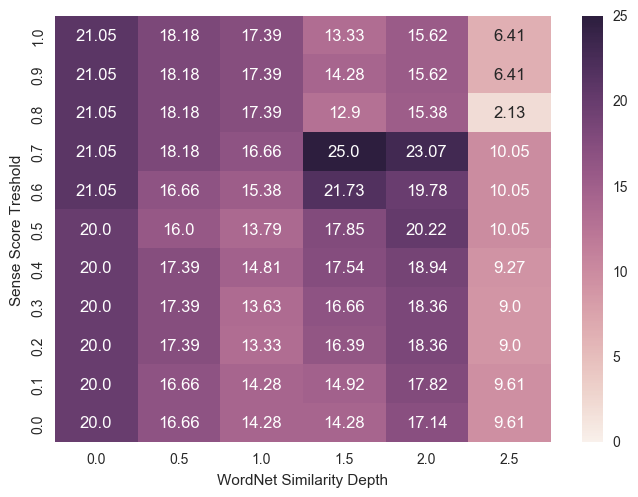

In [3]:
df = pd.DataFrame({'2.5' : [20, 20, 20, 20, 20, 20, 21.05, 21.05, 21.05, 21.05, 21.05], 
'2.0' : [16.66, 16.66, 17.39, 17.39, 17.39, 16, 16.66, 18.18, 18.18, 18.18, 18.18], 
'1.5' : [14.28, 14.28, 13.33, 13.63, 14.81, 13.79, 15.38, 16.66, 17.39, 17.39, 17.39], 
'1.0' : [14.28, 14.92, 16.39, 16.66, 17.54, 17.85, 21.73, 25, 12.9, 14.28, 13.33], 
'0.5' : [17.14, 17.82, 18.36, 18.36, 18.94, 20.22, 19.78, 23.07, 15.38, 15.62, 15.62], 
'0.0' : [9.61, 9.61, 9, 9, 9.27, 10.05, 10.05, 10.05, 2.13, 6.41, 6.41]})

ax = sns.heatmap(data=df, fmt="", annot=True, robust=True, linewidths=0, vmin=-0, vmax=25, cbar=True, xticklabels=[2.5, 2.0, 1.5, 1.0, 0.5, 0.0], yticklabels=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])       
ax.set_xlabel("WordNet Similarity Depth")
ax.set_ylabel("Sense Score Treshold")
ax.invert_xaxis()
ax.invert_yaxis()
sns.plt.show()